In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt

# Some warnings can be ignored in the produced notebook.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# RuuviTag data-analytics
Analyzed and visualized [RuuviTag](https://ruuvi.com/ruuvitag/) data from my home from 2023.

I made Iot-project related to my studies in november 2022. Check out the project via [this](https://student.labranet.jamk.fi/~aa5348/Iot_johdanto/Iot-projekti.html) link.

Data has been collected for a year now and it's time to look at what temperatures, humidity and air pressure values have been in my home in 2023.

In this file I will analyze data that is preprosessed [here](https://github.com/kallepesko/RuuviTag-data-made-in-home/blob/main/ruuvidata_2023_understand_and_preprocess.ipynb).

In [2]:
url = 'data/ruuvidata_2023_preprocessed.csv'
df = pd.read_csv(url,index_col=0)

# make sure that index is datetime
df.index = pd.to_datetime(df.index,format='ISO8601')

In [3]:
df

,location,battery,humidity,pressure,temperature
time,,,,,
2023-01-01 12:25:00,Bath room,3034,22.55,98777,25.12
2023-01-01 12:45:00,Bath room,3038,22.44,98801,25.14
2023-01-01 12:49:00,Bath room,3038,22.41,98794,25.13
2023-01-01 13:19:00,Bath room,3041,22.12,98805,25.16
2023-01-01 13:21:00,Bath room,3041,22.12,98806,25.14
...,...,...,...,...,...
2023-12-30 11:39:00,Living room,2999,24.45,99159,22.32
2023-12-30 11:55:00,Living room,2992,24.31,99169,21.77
2023-12-30 11:57:00,Living room,2995,24.25,99167,21.84


Divide the data of different rooms into their own data frames.

In [4]:
bed = df[df['location'] == 'Bed room'].copy()
#display(bed['location'].value_counts())

bath = df[df['location'] == 'Bath room'].copy()
#display(bath['location'].value_counts())

living = df[df['location'] == 'Living room'].copy()
#living['location'].value_counts()

At first I want to know rooms statistical information from whole year.

## Statistical information from year 2023

Information from different rooms.

In [5]:
bed.describe()

,battery,humidity,pressure,temperature
count,243247.000000,243247.000000,243247.000000,243247.000000
mean,2953.634738,40.016253,100034.811739,20.413032
std,28.566279,13.008809,1247.704298,1.847264
min,2798.000000,15.350000,95998.000000,14.760000
25%,2939.000000,29.350000,99221.500000,19.080000
50%,2957.000000,36.490000,100126.000000,19.880000
75%,2971.000000,51.900000,100936.000000,21.670000
max,3122.000000,74.990000,102975.000000,26.840000


In [6]:
bath.describe()

,battery,humidity,pressure,temperature
count,238031.000000,238031.000000,238031.000000,238031.000000
mean,2967.270977,36.809267,100073.120446,22.659654
std,22.401609,13.194134,1238.413025,2.119704
min,2883.000000,13.350000,95991.000000,17.290000
25%,2953.000000,25.790000,99287.000000,21.390000
50%,2971.000000,33.160000,100161.000000,22.380000
75%,2981.000000,48.860000,100967.000000,23.420000
max,3094.000000,80.280000,102968.000000,46.180000


In [7]:
living.describe()

,battery,humidity,pressure,temperature
count,283028.000000,283028.000000,283028.000000,283028.000000
mean,3008.633658,38.216591,100067.785131,21.696541
std,10.777382,13.692469,1239.848703,1.025958
min,2957.000000,17.630000,95976.000000,18.170000
25%,3002.000000,26.730000,99276.000000,20.960000
50%,3009.000000,33.530000,100157.000000,21.500000
75%,3016.000000,51.240000,100973.000000,22.200000
max,3101.000000,71.880000,102952.000000,26.510000


#### Notes from whole years information.

Bath room is the warmest room and suprisingly also the driest room. Conclusion is that even if we use shower and sauna, the moisture is removed effectively and the space is mostly dry.

In bed and living room has been very high humidity values. Values has been over 70 %. We know if there is over 70 % values for longer periods it might be harmful for house. I want to know more about these high humidity periods.

If we examine standard deviations it seems like living rooms temperature is most stable. On the other hand, bathroom values vary more. It makes sence.

## 1. Bed room

Now I will start from bed room. I will try different things... I'm not sure what. And warning. This can end to be a messy documentation. But I don't care...

When I have learned how to visualize and analyze this in proper way then I will do the same things to other rooms as well... :) Let's see where I end up...

First I divide data to heating and summer seasons. 

### 1.2 Statistical information from heating season and summer seasons in bed room

Heating season in year 2023 was in next periods:

    - 01.01 - 30.4
    - 1.10 - 31.12

In [8]:
# summer season = ss
bed_ss = bed[ (bed.index > '2023-04-30') & (bed.index < '2023-10-01') ]
display('Summer season 2023',bed_ss.head(1),bed_ss.tail(1))

# heating season = hs
bed_hs = bed[ (bed.index < '2023-04-30') | (bed.index > '2023-10-01') ]
display('Heating season 2023',bed_hs.head(1),bed_hs.tail(1) )

'Summer season 2023'

,location,battery,humidity,pressure,temperature
time,,,,,
2023-04-30 00:02:00,Bed room,2967,31.77,99985,18.34


,location,battery,humidity,pressure,temperature
time,,,,,
2023-09-30 23:57:00,Bed room,2957,56.63,98956,20.91


'Heating season 2023'

,location,battery,humidity,pressure,temperature
time,,,,,
2023-01-01 09:44:00,Bed room,3073,38.83,98671,18.66


,location,battery,humidity,pressure,temperature
time,,,,,
2023-12-30 12:01:00,Bed room,2921,26.55,99196,19.32


**Summer season**

In [9]:
bed_ss.describe()

,battery,humidity,pressure,temperature
count,103271.000000,103271.000000,103271.000000,103271.000000
mean,2968.339195,51.632295,100318.382082,21.933743
std,12.741673,9.780729,914.910379,1.749759
min,2907.000000,24.950000,97705.000000,17.110000
25%,2960.000000,44.030000,99684.000000,20.850000
50%,2967.000000,53.790000,100376.000000,21.980000
75%,2978.000000,58.900000,100989.000000,23.020000
max,3009.000000,74.990000,102249.000000,26.840000


**Heating season**

In [10]:
bed_hs.describe()

,battery,humidity,pressure,temperature
count,139975.000000,139975.000000,139975.000000,139975.000000
mean,2942.785962,31.446208,99825.598978,19.291093
std,31.954567,7.106990,1408.784867,0.840372
min,2798.000000,15.350000,95998.000000,14.760000
25%,2925.000000,26.340000,98934.000000,18.770000
50%,2946.000000,30.540000,99825.000000,19.340000
75%,2957.000000,35.040000,100847.000000,19.820000
max,3122.000000,60.020000,102975.000000,22.730000


Average temperature is below 20 in heating season. It is good. 

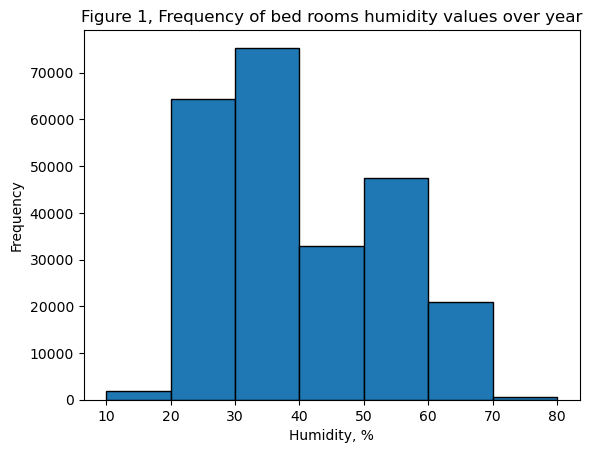

In [11]:
bed['humidity'].plot.hist(bins=np.arange(10,90,10),edgecolor='black')
plt.xlabel('Humidity, %')
plt.title('Figure 1, Frequency of bed rooms humidity values over year')
plt.show()

Create a line plot where is used both summer and heating seasons data.

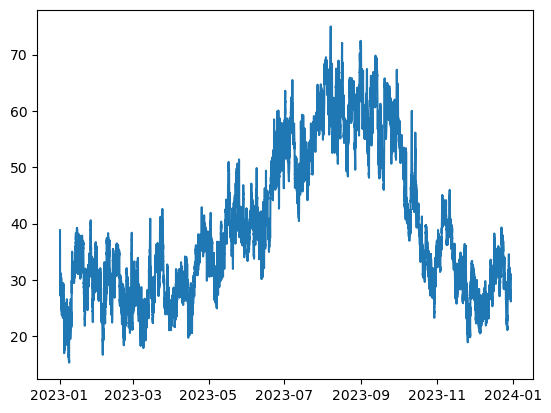

In [12]:
# all data
plt.plot(bed.index,bed['humidity'])
plt.show()

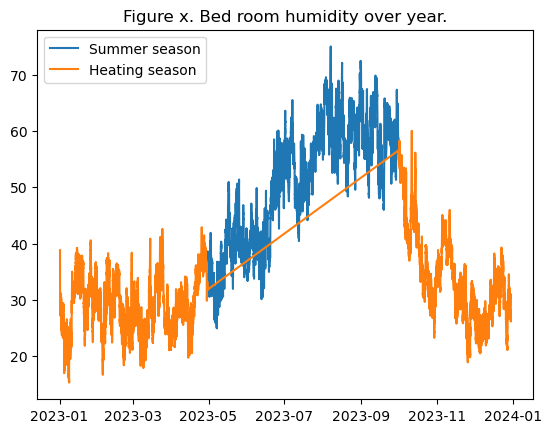

In [13]:
plt.plot(bed_ss.index,bed_ss['humidity'], label='Summer season')
plt.plot(bed_hs.index,bed_hs['humidity'], label='Heating season')
plt.title('Figure x. Bed room humidity over year.')


plt.legend()

plt.show()

How to ged rid of the heating seasons straight line through summer season?

    - I desided to plot it in two separate plots.

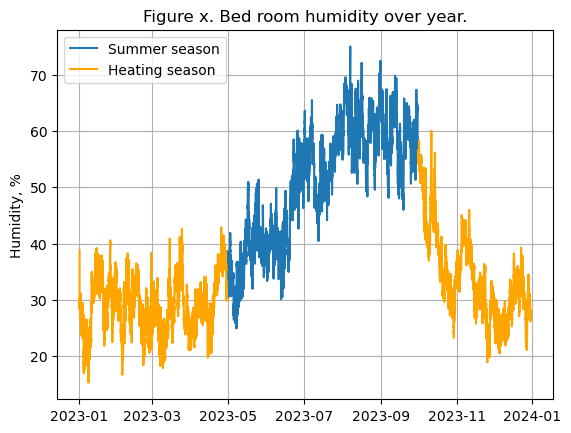

In [14]:
plt.plot(bed_ss.index,bed_ss['humidity'], label='Summer season')

temp = bed_hs[bed_hs.index < '2023-05-01' ]
plt.plot(temp.index, temp['humidity'], 'orange', label='Heating season')

temp = bed_hs[bed_hs.index > '2023-10-01' ]
plt.plot(temp.index, temp['humidity'], 'orange')

plt.title('Figure x. Bed room humidity over year.')
plt.grid()
plt.legend()
plt.ylabel('Humidity, %')

plt.show()

Toimii noinkin...

After this I try resampling data. Resalmpling is like using groupby -method, but it is made for timeseries data. I try to resample data that I can create new feature 'day_avg' for days average value. I wish to get smoother line.

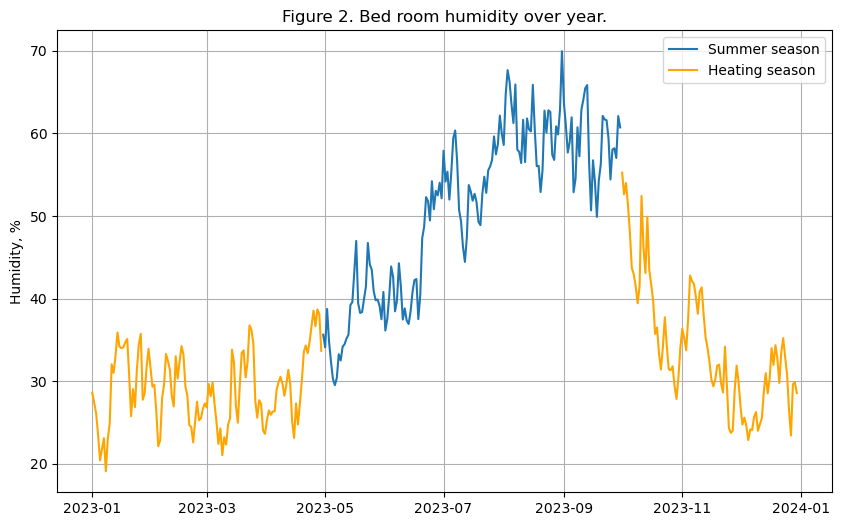

In [15]:
plt.figure(figsize=(10,6))

plt.plot(bed_ss[['humidity']].resample('d').mean().index,
         bed_ss[['humidity']].resample('d').mean()['humidity'],
         label='Summer season')

temp = bed_hs[bed_hs.index < '2023-05-01' ]
plt.plot(temp[['humidity']].resample('d').mean().index,
         temp[['humidity']].resample('d').mean()['humidity'],
         'orange',
         label='Heating season')

temp = bed_hs[bed_hs.index > '2023-10-01' ]
plt.plot(temp[['humidity']].resample('d').mean().index,
         temp[['humidity']].resample('d').mean()['humidity'],
         'orange')

plt.title('Figure 2. Bed room humidity over year.')
plt.grid()
plt.legend()
plt.ylabel('Humidity, %')

plt.show()

This is best figure for now. I forgot the new feature... maybe later...

Let's create same figures for temperature and air pressure.

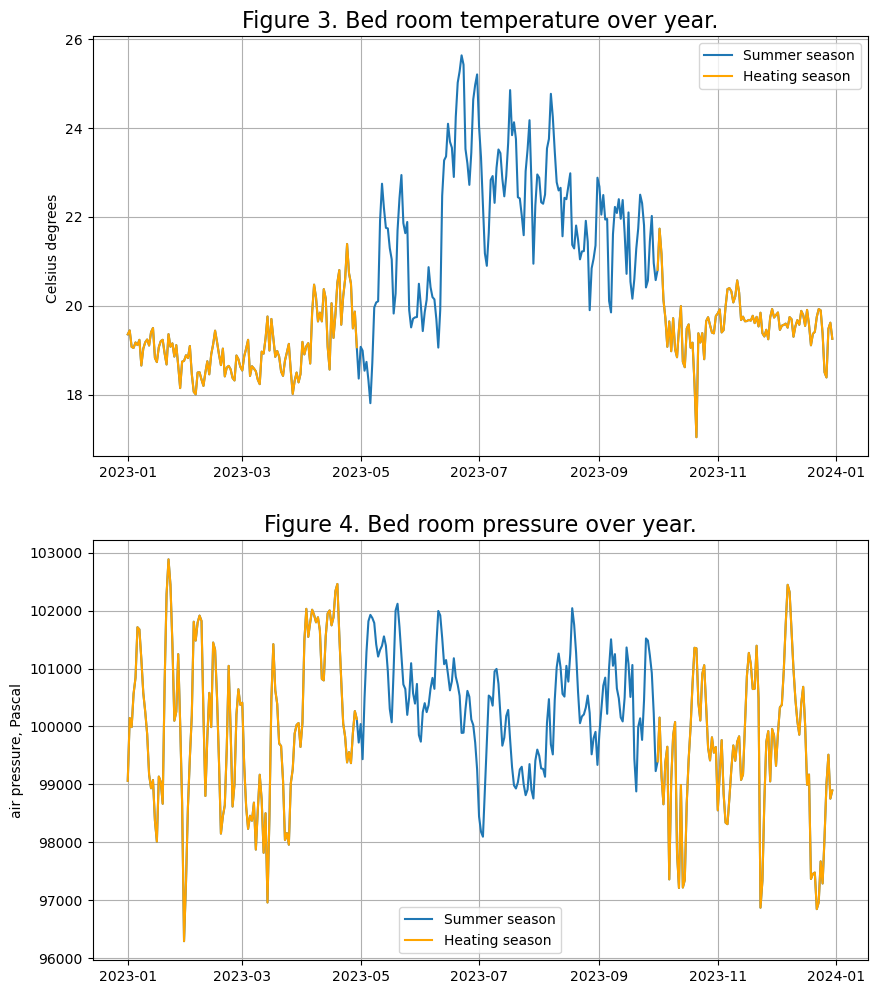

In [16]:
fig, ax = plt.subplots(2,1,figsize=(10,12))

# First plot for temperature
ax[0].plot(bed[['temperature']].resample('d').mean().index,
         bed[['temperature']].resample('d').mean()['temperature'],
         label='Summer season')

temp = bed_hs[bed_hs.index < '2023-05-01' ]
ax[0].plot(temp[['temperature']].resample('d').mean().index,
         temp[['temperature']].resample('d').mean()['temperature'],
         'orange',
         label='Heating season')

temp = bed_hs[bed_hs.index > '2023-10-01' ]
ax[0].plot(temp[['temperature']].resample('d').mean().index,
         temp[['temperature']].resample('d').mean()['temperature'],
         'orange')
ax[0].set_title('Figure 3. Bed room temperature over year.',size=16)
ax[0].grid()
ax[0].legend()
ax[0].set_ylabel(f'Celsius degrees ')

# Second plot for air pressure
ax[1].plot(bed[['pressure']].resample('d').mean().index,
         bed[['pressure']].resample('d').mean()['pressure'],
         label='Summer season')

temp = bed_hs[bed_hs.index < '2023-05-01' ]
ax[1].plot(temp[['pressure']].resample('d').mean().index,
         temp[['pressure']].resample('d').mean()['pressure'],
         'orange',
         label='Heating season')

temp = bed_hs[bed_hs.index > '2023-10-01' ]
ax[1].plot(temp[['pressure']].resample('d').mean().index,
         temp[['pressure']].resample('d').mean()['pressure'],
         'orange')
ax[1].set_title('Figure 4. Bed room pressure over year.',size=16)
ax[1].grid()
ax[1].legend()

plt.ylabel('air pressure, Pascal')

plt.show()